In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
%matplotlib inline

## PROBLEM 1
You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [2]:
survey = pd.read_excel('Election_Data.xlsx')
survey.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


**Data Dictionary**	
	
1. vote: Party choice: Conservative or Labour	
	
2. age: in years	
	
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.	
	
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.	
	
5. Blair: Assessment of the Labour leader, 1 to 5.	
	
6. Hague: Assessment of the Conservative leader, 1 to 5.	
	
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.	
	
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.	
	
9. gender: female or male.	

1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

#### Q 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

## PROBLEM 1
You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [3]:
survey.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
survey.shape

(1525, 10)

In [5]:
survey.drop('Unnamed: 0',axis=1,inplace=True)

Unnamed:0 column is an redundant column, so no need to keep it for further use and it will also help in reducing memory usage.

In [6]:
survey.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [7]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


1. There are 1525 rows and 9 columns in the dataframe.
2. There are no null values present in the data frame.
3. There are 07 int and 02 object type data present in the data.
4. All the data type are found correct as per their values in the dataframe, So there are no annamolies present in the data.
5. There is 107.4+ KB memory usage in the data.

In [8]:
cat = []
num = []
for i in survey.columns:
    if survey[i].dtype =='object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)
    

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [9]:
survey.duplicated().sum()

8

There are 8 dulplicated rows which are just redundant rows so we need to drop these.

In [10]:
survey.drop_duplicates(inplace=True)

In [11]:
survey[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


As we can check from the description of the data
1. The minimum age for voting is 24 years in Europe.
2. The Economic condition for national is good as the mean is on the higher side.
3. Same for economic condition of the household is also good as its mean is also on the higher side.
4. The Assesment of the Labour leader is good as its mean is 3.3 which is on higher side.
5. THe Assesment of the Conservative leader is not good its mean is on the lower side.

In [12]:
survey[cat].describe().T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


1. Labour has the most vote.
2. THere are more female voters than male voters.

In [13]:
for i in survey.columns:
    if survey[i].dtype == 'object':
        print(i.upper(), ':',survey[i].nunique())
        print(survey[i].value_counts().sort_values())
        print('')

VOTE : 2
Conservative     460
Labour          1057
Name: vote, dtype: int64

GENDER : 2
male      709
female    808
Name: gender, dtype: int64



#### Q-1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

**Exploratory Data Analysis (EDA)**

##### Univariate Analysis

C:\Users\home9\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\home9\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\home9\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

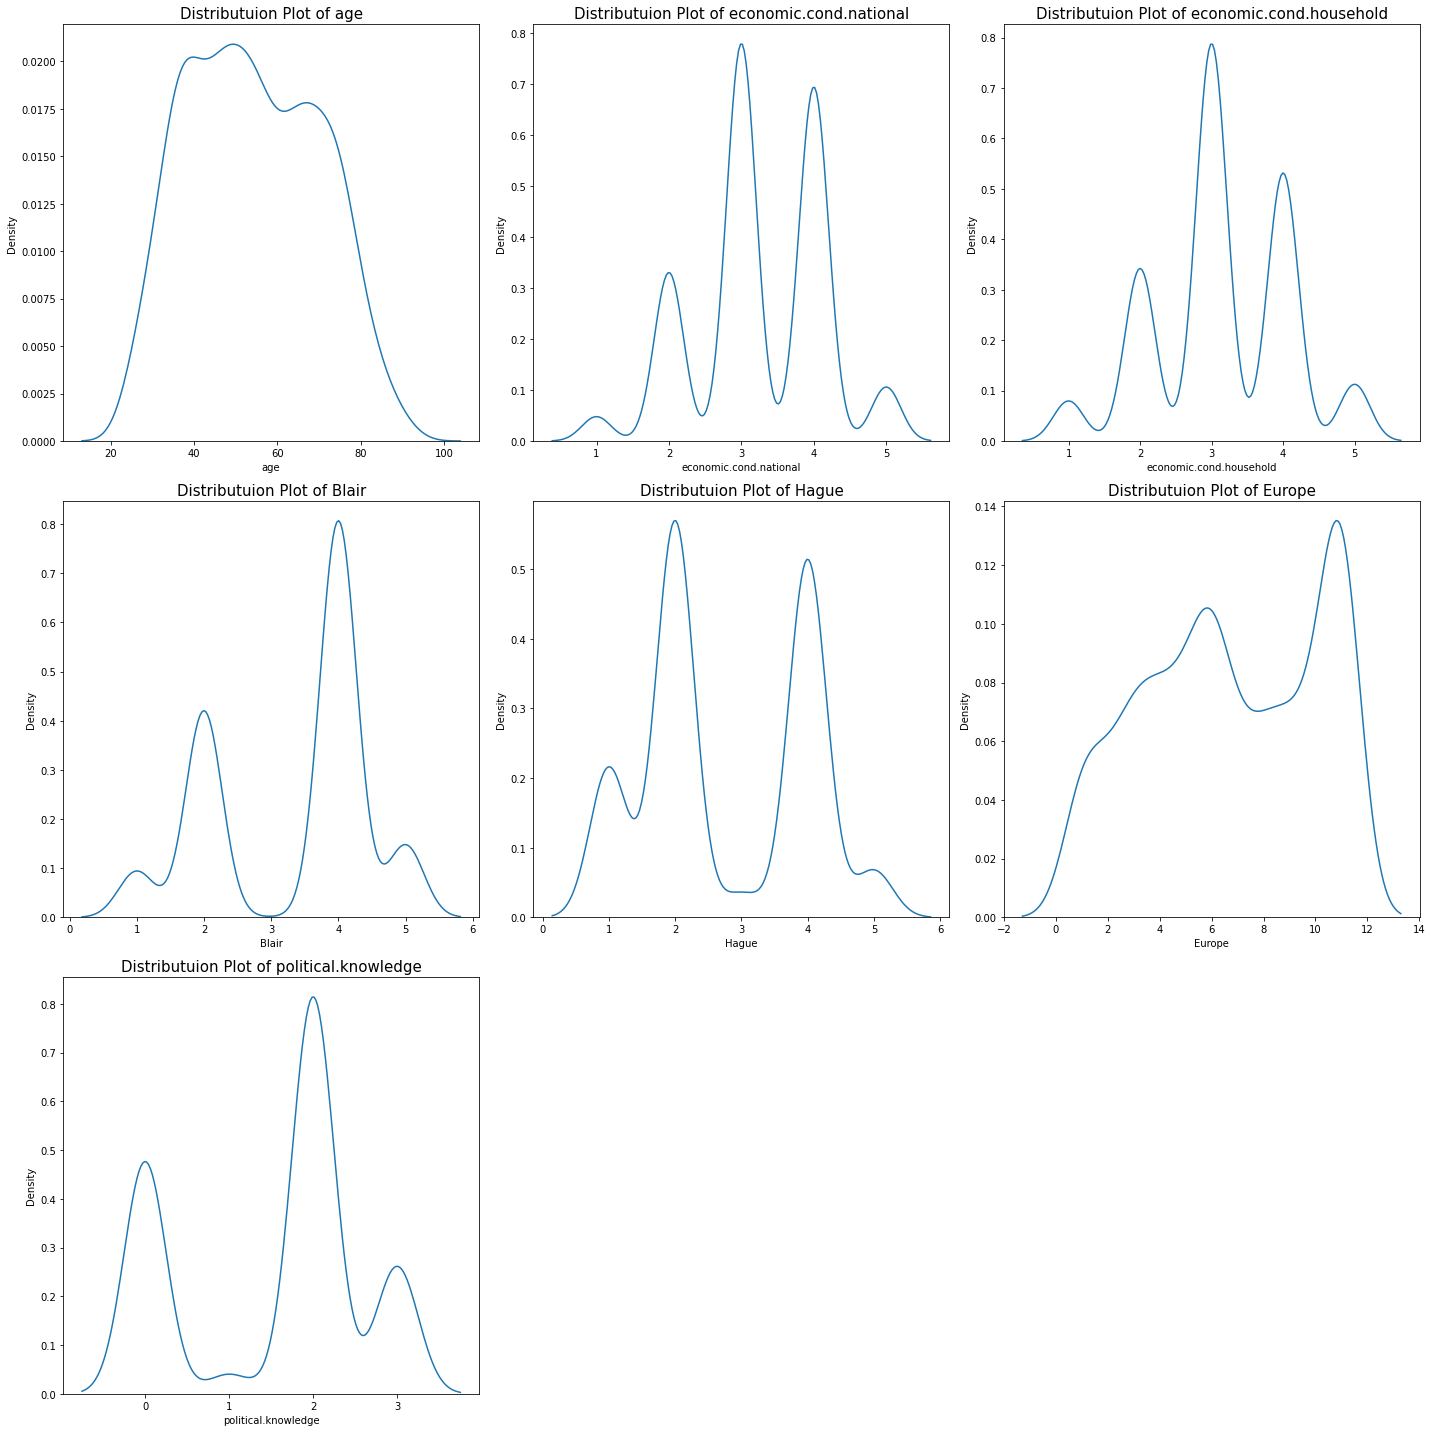

In [14]:
data_plot = survey[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']]
fig = plt.figure(figsize=(20,20))
for column in range(0,len(data_plot.columns)):
    ax = fig.add_subplot(3,3,column+1)
    sns.distplot(data_plot[data_plot.columns[column]],hist=False)
    plt.title('Distributuion Plot of {}'.format(data_plot.columns[column]),fontdict={'fontsize': 15,'color': 'black',
                                                                                     'fontweight':10})
    plt.tight_layout()
    plt.show;

In [15]:
from scipy.stats import skew
for i in data_plot:
    print('Skewness of {} is {}'.format(i,data_plot[i].skew()))

Skewness of age is 0.13979987012068112
Skewness of economic.cond.national is -0.23847421478161793
Skewness of economic.cond.household is -0.14414766882077137
Skewness of Blair is -0.5395141989831328
Skewness of Hague is 0.1461913444629453
Skewness of Europe is -0.14189094981032258
Skewness of political.knowledge is -0.4229276205374301


**As we can Check from the above Plot and stat**
1. Age and Hague has very slight skewness towards right side and the value is almost near to zero which can help us assume normal distribution .
2. economic.cond.national, economic.cond.household, Europe all these variables are slightly left skewed.
3. Blair and Political.knowledge are the two predictors which have high negative stats value i.e. -0.539 and -0.423 resp, which shows moderately left skewed distribution.

C:\Users\home9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home9\anaconda3\lib\si

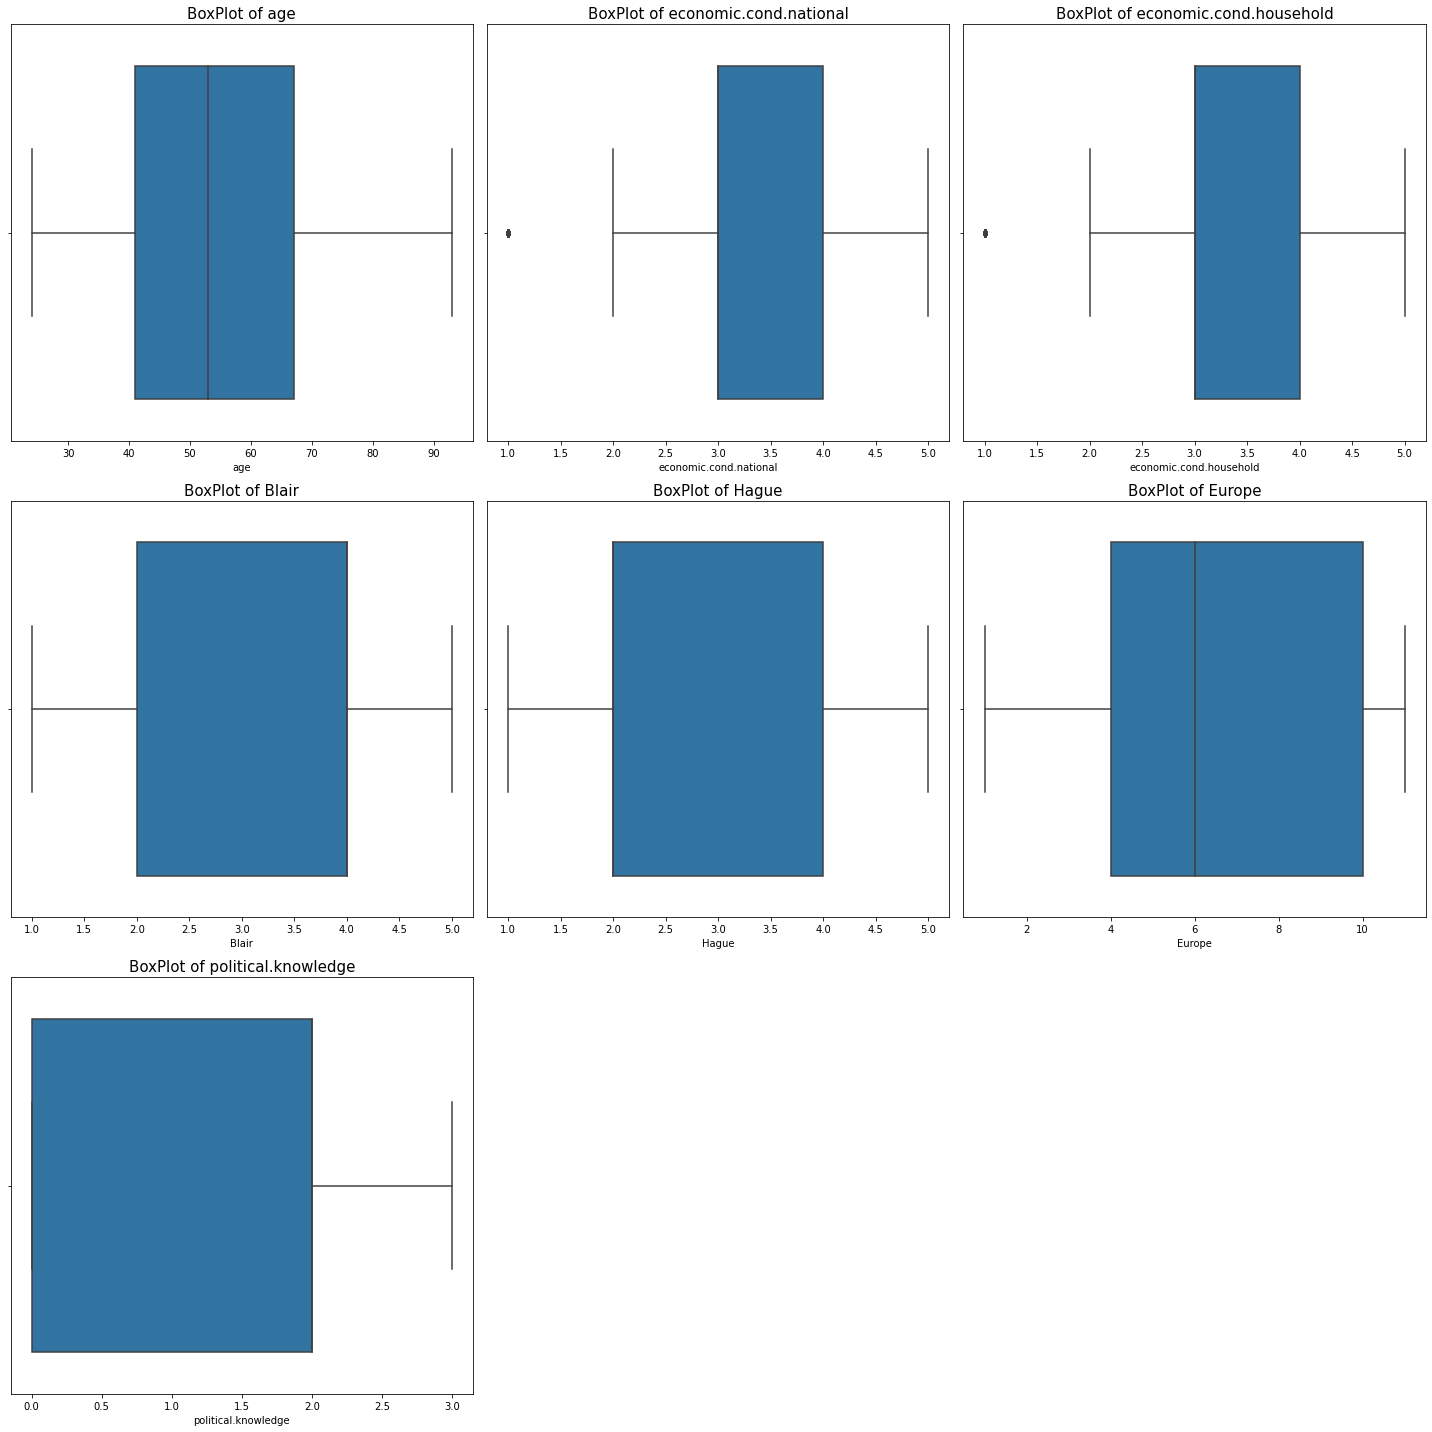

In [16]:
data_plot = survey[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']]
fig = plt.figure(figsize=(20,20))
for column in range(0,len(data_plot.columns)):
    ax = fig.add_subplot(3,3,column+1)
    sns.boxplot(data_plot[data_plot.columns[column]])
    plt.title('BoxPlot of {}'.format(data_plot.columns[column]),fontdict={'fontsize': 15,'color': 'black',
                                                                                     'fontweight':10})
    plt.tight_layout()
    plt.show;

**As We can Check from the Boxplot**
1. economic.cond.national, economic.cond.household are the only two predictors which have only one outlier present in the data.

C:\Users\home9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


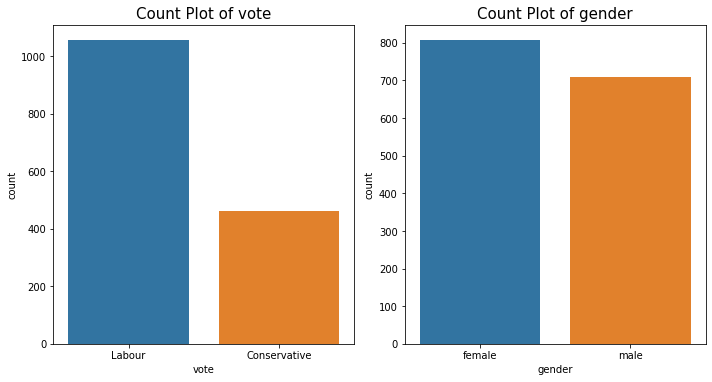

In [17]:
data_plot = survey[['vote','gender']]
fig = plt.figure(figsize=(10,10))
for column in range(0,len(data_plot.columns)):
    ax = fig.add_subplot(2,2,column+1)
    sns.countplot(data_plot[data_plot.columns[column]])
    plt.title('Count Plot of {}'.format(data_plot.columns[column]),fontdict={'fontsize': 15,'color': 'black',
                                                                                     'fontweight':10})
    plt.tight_layout()
    plt.show;

**As we can see from the count plot**
1. As per the given data labour party has higher chance of winning the elections as they have 70 % vote in their favour.
2. There are more female voters than male voters.

In [18]:
survey['vote'].value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

##### Bi-Variate Analysis

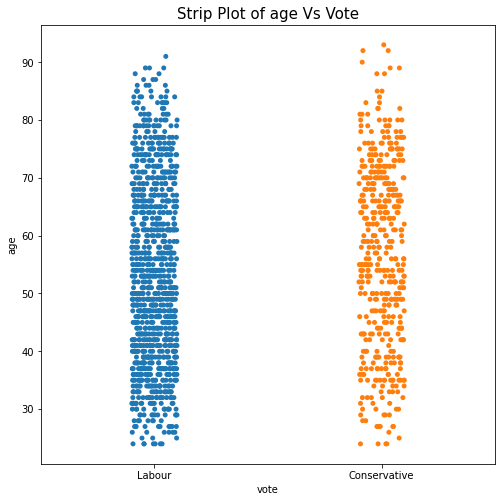

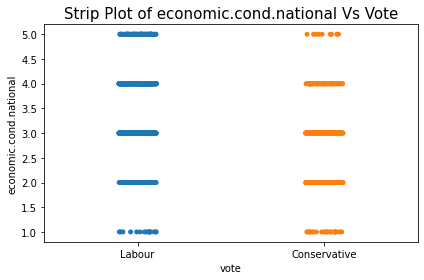

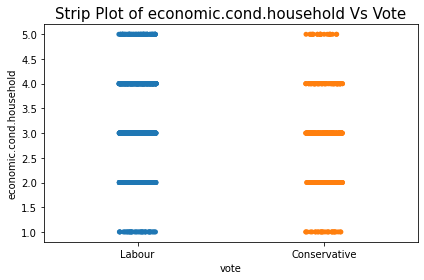

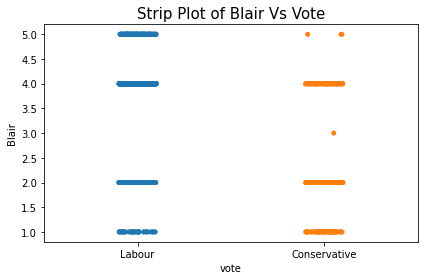

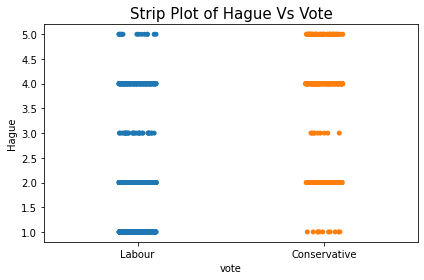

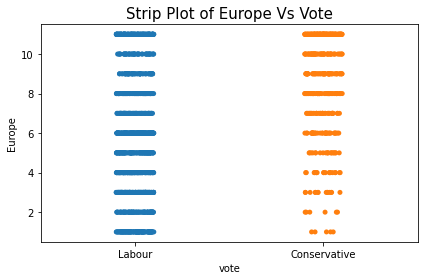

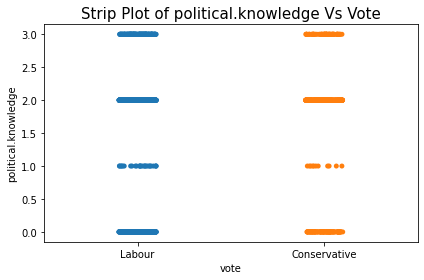

In [19]:
data_plot = survey[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']]
fig = plt.figure(figsize=(20,20))
for column in range(0,len(data_plot.columns)):
    ax = fig.add_subplot(3,3,column+1)
    sns.stripplot(y=data_plot[data_plot.columns[column]],x=survey['vote'])
    plt.title('Strip Plot of {} Vs Vote'.format(data_plot.columns[column]),fontdict={'fontsize': 15,'color': 'black',
                                                                                     'fontweight':10})
    plt.tight_layout()
    plt.show();

**As We can check from the above plots**
1. All the age groups Vote for both parties.
2. There are more number of People who vote for labour than conservative party thinks that the national economic condition is at the best.
3. There are less number of People who vote for conservative than labour party thinks that the household economic condition is not at the best.
4. Voters of both parties have high eurosceptic sentiment.

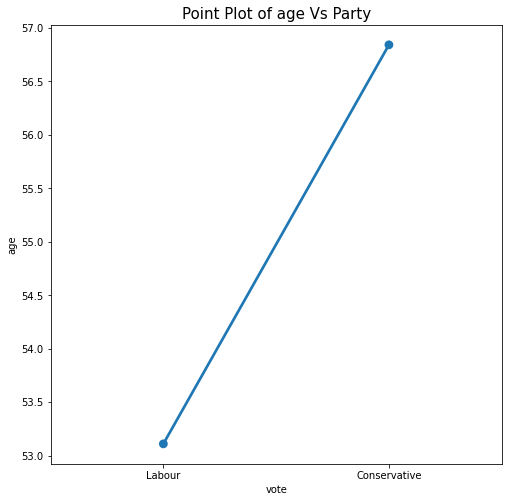

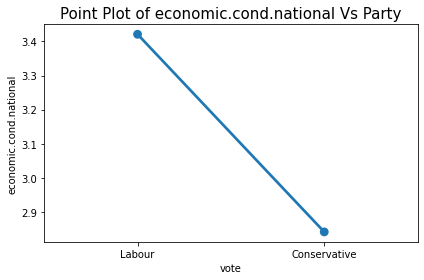

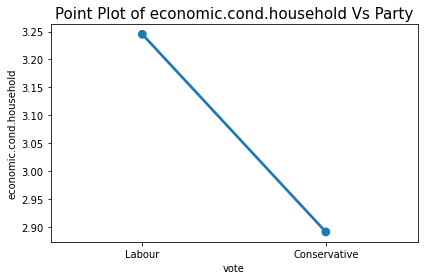

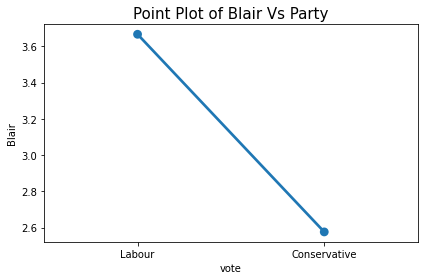

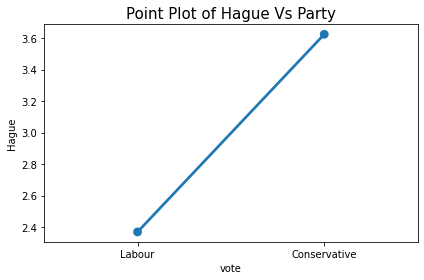

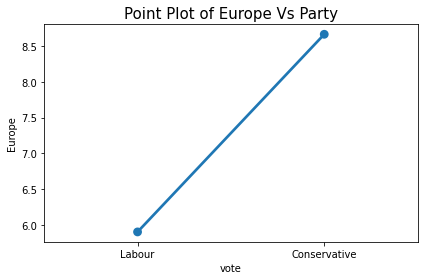

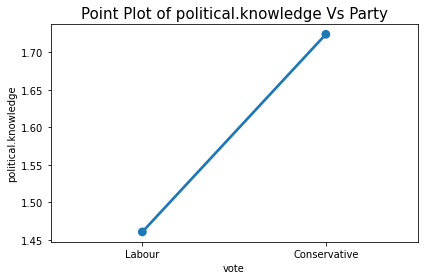

In [20]:
data_plot = survey[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']]
fig = plt.figure(figsize=(20,20))
for column in range(0,len(data_plot.columns)):
    ax = fig.add_subplot(3,3,column+1)
    sns.pointplot(y=data_plot[data_plot.columns[column]],x=survey['vote'],ci=None)
    plt.title('Point Plot of {} Vs Party'.format(data_plot.columns[column]),fontdict={'fontsize': 15,'color': 'black',
                                                                                     'fontweight':10})
    plt.tight_layout()
    plt.show();

<AxesSubplot:xlabel='Europe', ylabel='age'>

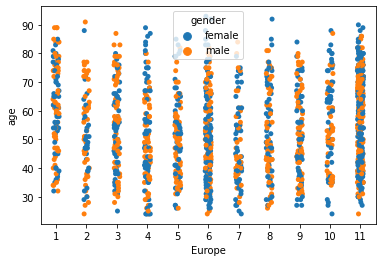

In [21]:
sns.stripplot(y='age',x= 'Europe',hue='gender',data=survey)

<AxesSubplot:xlabel='Hague', ylabel='age'>

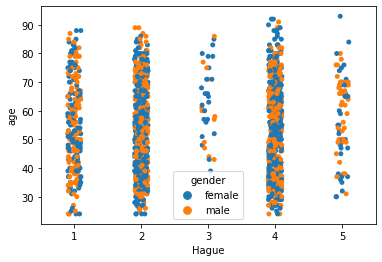

In [22]:
sns.stripplot(x='Hague',y= 'age',hue='gender',data=survey)

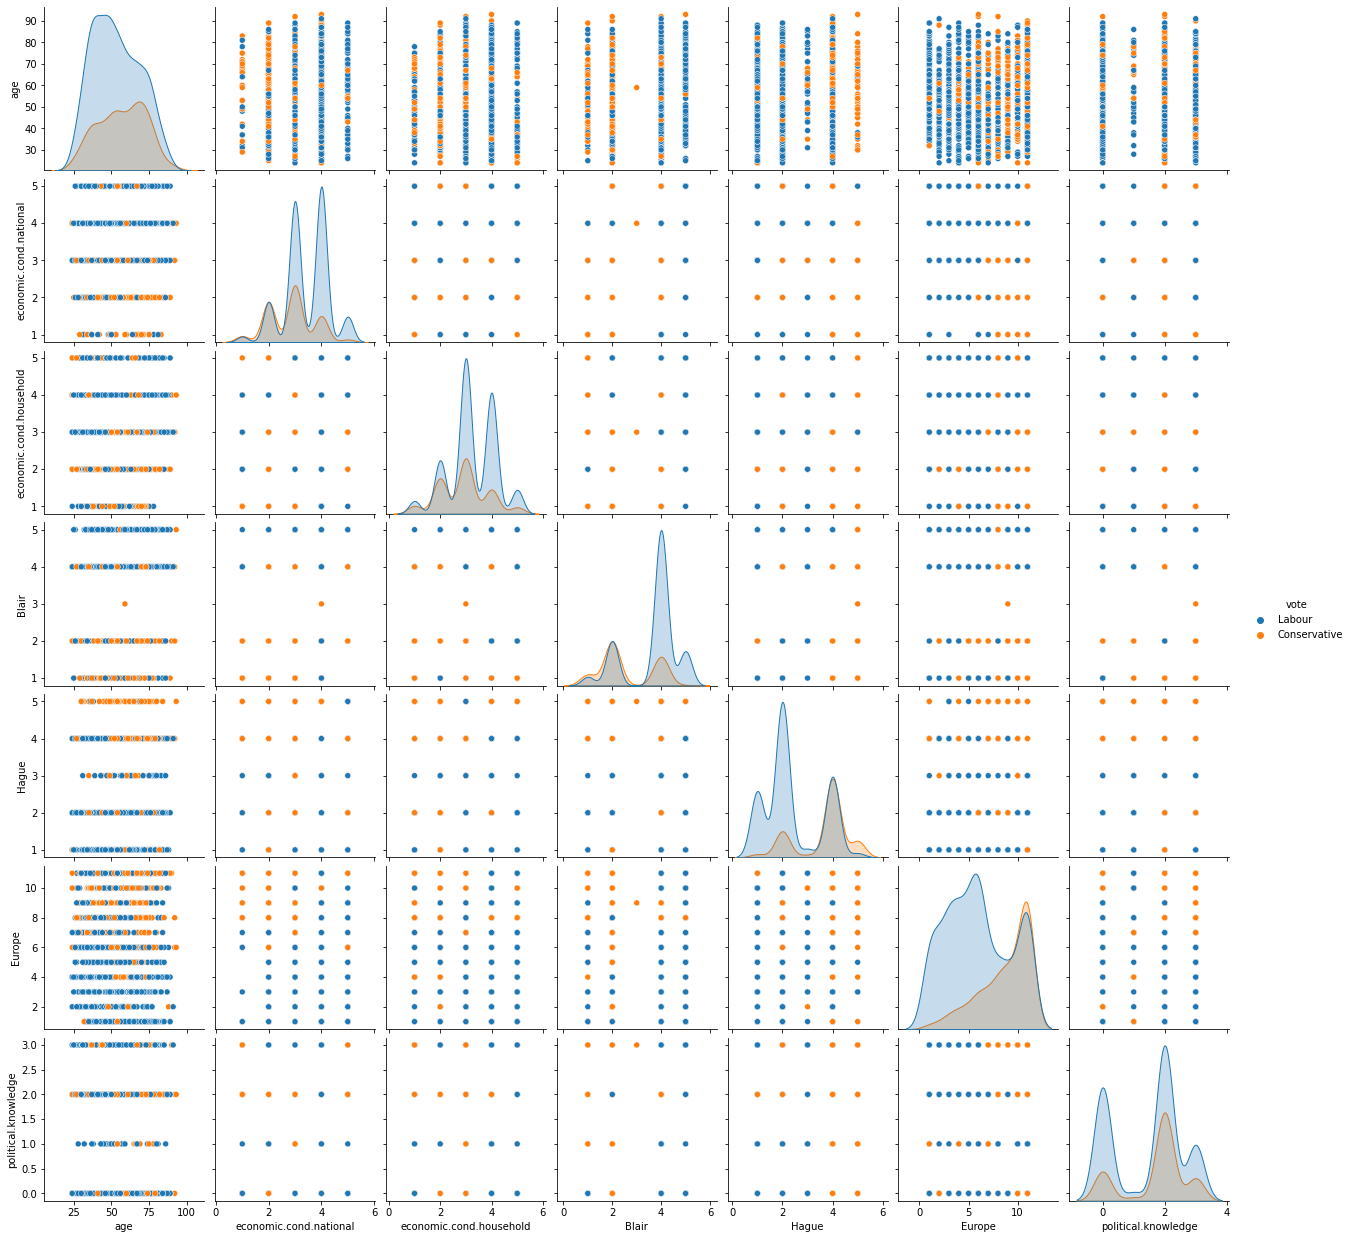

In [23]:
sns.pairplot(survey, hue = 'vote')

**As we can see from the pair plot**

There is no much correlation can be seen between the predictor variables.

<AxesSubplot:>

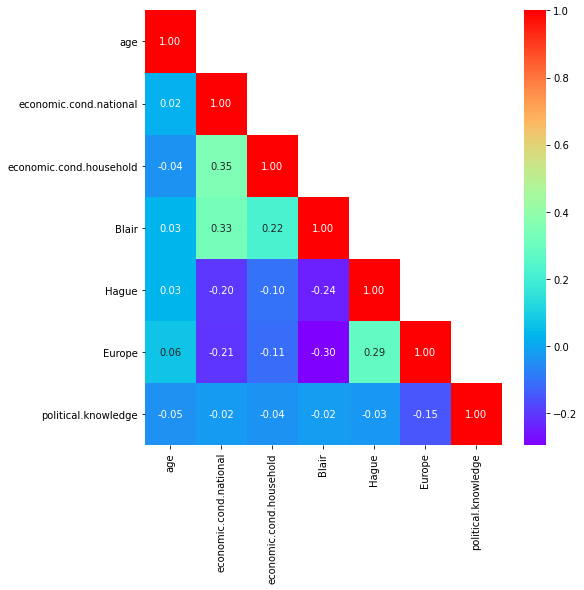

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(survey.corr(),annot=True,fmt='0.2f',mask=np.triu(survey.corr(),+1),cmap='rainbow')

**As we can see fro the correlation plot**

There are not much correlation presents in the data ,some of the independent varibles like economic.cond.national -- economic.cond.household, blair -- economic.cond.national & economic.cond.household and Europe -- Hague are moderately correlated.

#### Q-1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

***ENCODING THE DATA***

In [25]:
survey.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
LE = LabelEncoder()

In [28]:
survey['vote'] = LE.fit_transform(survey['vote'])

In [29]:
survey.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,female
1,1,36,4,4,4,4,5,2,male
2,1,35,4,4,5,2,3,2,male
3,1,24,4,2,2,1,4,0,female
4,1,41,2,2,1,1,6,2,male


In [30]:
survey['vote'].value_counts()

1    1057
0     460
Name: vote, dtype: int64

0 - Conservative party 

1 - Labour party

In [31]:
survey_dummy = pd.get_dummies(survey,columns=['gender'],drop_first=True)

In [32]:
survey_dummy.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [33]:
survey_dummy.gender_male.value_counts()

0    808
1    709
Name: gender_male, dtype: int64

0 - Female

1 - Male

*****Is Scalling Necessary or not?*****

In [34]:
survey_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1517.0,0.696770,0.459805,0.0,0.0,1.0,1.0,1.0
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender_male,1517.0,0.467370,0.499099,0.0,0.0,0.0,1.0,1.0


As per the data in the data frame , out of 9 columns Vote is our target variable and gender is an categorical variable then apart from age column all other columns are ordinal columns, so these are rating values so by sclaing them will not be an affective idea and it will be more usefull in model performance without scalling. The models which we are going to build are Logistic regression , Linear discriminanat analysis , Naive Bayes, K nearest neighbours, in which Except KNN all other models are not much affected by scaling.

KNN is a distance based model in all the independent variable should be on same scale so that distace of each data point can be measured correctly. so for building KNN we need to scale the data.

*****Data Splitting 70:30*****

In [35]:
X = survey_dummy.drop('vote',axis = 1)
y = survey_dummy.pop('vote')

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1061, 8)
(456, 8)
(1061,)
(456,)


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
SS = StandardScaler()

In [41]:
X_train_scaled = SS.fit_transform(X_train)
X_test_scaled = SS.transform(X_test)

For KNN we need scaled data as it is a distance based model, so we need all the predictors on same scale.

In [42]:
X_train_scaled

array([[-1.29671043, -1.45558149,  0.90210034, ...,  1.33208942,
         0.45223123, -0.93695043],
       [-0.91033745,  0.87730667, -0.16374427, ..., -0.20215599,
        -1.4075259 ,  1.06729232],
       [ 0.44196795,  0.87730667, -0.16374427, ...,  0.10469309,
         0.45223123, -0.93695043],
       ...,
       [ 1.2791094 ,  0.87730667, -0.16374427, ...,  1.33208942,
        -1.4075259 , -0.93695043],
       [-1.48989691, -0.28913741, -0.16374427, ..., -0.20215599,
        -1.4075259 , -0.93695043],
       [ 2.24504183, -0.28913741,  1.96794496, ..., -1.7364014 ,
        -1.4075259 ,  1.06729232]])

#### Q-1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV

*****LOGISTIC REGRESSION MODEL*****

In [44]:
LR = LogisticRegression(max_iter=10000,random_state=1,)

In [45]:
LR.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=1)

In [46]:
ytrain_predict = LR.predict(X_train)
ytest_predict = LR.predict(X_test)

In [47]:
ytrain_predict_prob = LR.predict_proba(X_train)
ytest_predict_prob = LR.predict_proba(X_test)

In [48]:
for idx,col in enumerate(X_train.columns):
    print('The Coefficient of {} is {}'.format(col,LR.coef_[0][idx]))

The Coefficient of age is -0.014958728279182067
The Coefficient of economic.cond.national is 0.6284920003187814
The Coefficient of economic.cond.household is 0.06305081800974509
The Coefficient of Blair is 0.6008794573583591
The Coefficient of Hague is -0.8233082296459409
The Coefficient of Europe is -0.21162032502062234
The Coefficient of political.knowledge is -0.32183229467434155
The Coefficient of gender_male is 0.19191024895010797


In [49]:
print(classification_report(y_train,ytrain_predict))
print('')
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061


              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



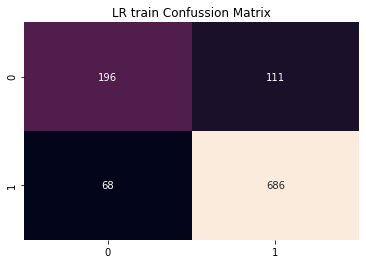

In [50]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,cbar=None,fmt='0.0f')
plt.title('LR train Confussion Matrix')
plt.show;

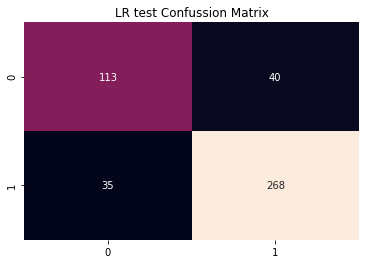

In [51]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=None,fmt='0.0f')
plt.title('LR test Confussion Matrix')
plt.show;

AUC SCORE : 0.890


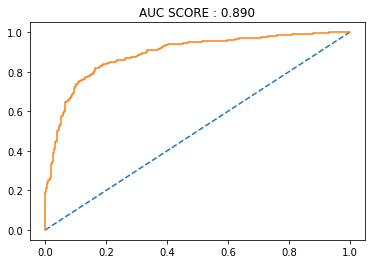

In [52]:
probs = ytrain_predict_prob[:,1]
auc = roc_auc_score(y_train,probs)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_train,probs)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);


AUC SCORE : 0.883


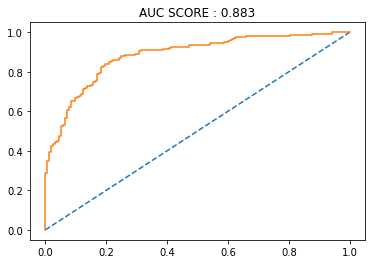

In [53]:
probs = ytest_predict_prob[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_test,probs)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

In [54]:
param_grid = {'penalty':['l2','none'],
             'solver':['newton-cg','sag'],
             'tol':[0.0001,0.00001]}
model = LogisticRegression(max_iter=10000, random_state=1, n_jobs=2)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,cv = 10,scoring='f1') 

In [55]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          random_state=1),
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'sag'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [56]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}
LogisticRegression(max_iter=10000, n_jobs=2, random_state=1, solver='newton-cg')


In [57]:
best_model_LR = grid_search.best_estimator_

In [58]:
ytrain_predict = best_model_LR.predict(X_train)
ytest_predict = best_model_LR.predict(X_test)

In [59]:
ytrain_predict_prob = best_model_LR.predict_proba(X_train)
ytest_predict_prob = best_model_LR.predict_proba(X_test)

In [60]:
print(best_model_LR.score(X_train,y_train))
print('')
print(best_model_LR.score(X_test,y_test))

0.8312912346842601

0.8355263157894737


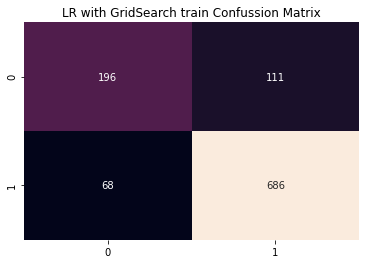

In [61]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,cbar=None,fmt='0.0f')
plt.title('LR with GridSearch train Confussion Matrix')
plt.show;

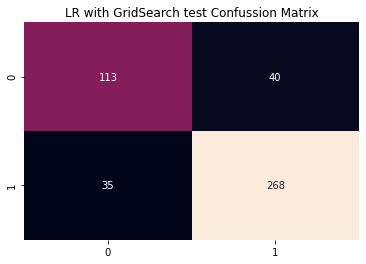

In [62]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=None,fmt='0.0f')
plt.title('LR with GridSearch test Confussion Matrix')
plt.show;

In [63]:
print(classification_report(y_train,ytrain_predict))
print('')
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061


              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



As we can check the data is balanced, so we can rely on accuracies of the model. By looking at the model performance on train and test data accuracy is almost similar which can justify that model is niether underfit nor over fit, MOdel is robust.

AUC SCORE : 0.890


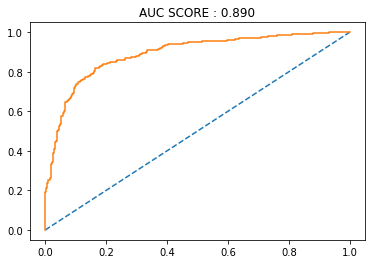

In [64]:
probs = ytrain_predict_prob[:,1]
auc = roc_auc_score(y_train,probs)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_train,probs)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);


AUC SCORE : 0.883


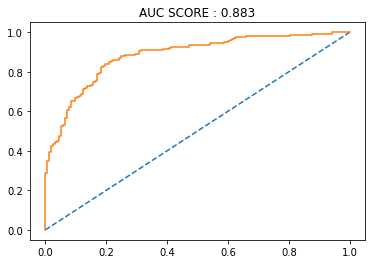

In [65]:
probs = ytest_predict_prob[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_test,probs)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

In [66]:
print('The intercept is {}'.format(best_model_LR.intercept_))

The intercept is [2.0753724]


In [67]:
for idx,col in enumerate(X_train.columns):
    print('The Coefficient of {} is {}'.format(col,best_model_LR.coef_[0][idx]))

The Coefficient of age is -0.0149478523881291
The Coefficient of economic.cond.national is 0.6287125174224617
The Coefficient of economic.cond.household is 0.06308926819817559
The Coefficient of Blair is 0.6008660045663539
The Coefficient of Hague is -0.8232356178443372
The Coefficient of Europe is -0.21160763738003935
The Coefficient of political.knowledge is -0.3220118041793021
The Coefficient of gender_male is 0.191826482770269


*****LINEAR DISCRIMINANT ANALYSIS MODEL*****

In [68]:
LDA = LinearDiscriminantAnalysis()

In [69]:
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [70]:
ytrain_predict_LDA = LDA.predict(X_train)
ytest_predict_LDA = LDA.predict(X_test)

In [71]:
ytrain_predict_LDA_prob = LDA.predict_proba(X_train)
ytest_predict_LDA_prob = LDA.predict_proba(X_test)

In [72]:
for idx,col in enumerate(X_train.columns):
    print('The Coefficient of {} is {}'.format(col,LDA.coef_[0][idx]))

The Coefficient of age is -0.020037048856610347
The Coefficient of economic.cond.national is 0.6049204499917704
The Coefficient of economic.cond.household is 0.05006904695697722
The Coefficient of Blair is 0.7424003897819801
The Coefficient of Hague is -0.9266343785776759
The Coefficient of Europe is -0.22361192469849597
The Coefficient of political.knowledge is -0.4303348424332059
The Coefficient of gender_male is 0.14907997566596054


In [73]:
print(classification_report(y_train,ytrain_predict_LDA))
print('')
print(classification_report(y_test,ytest_predict_LDA))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061


              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



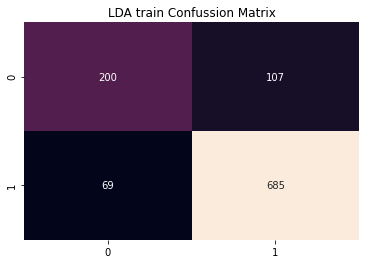

In [74]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict_LDA),annot =True,fmt = '0.0f',cbar=None)
plt.title('LDA train Confussion Matrix')
plt.show;

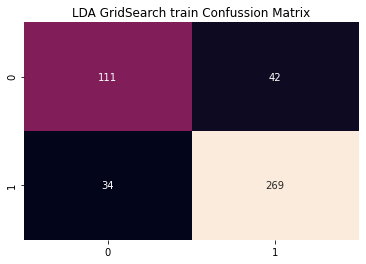

In [75]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_LDA),annot =True,fmt = '0.0f',cbar=None)
plt.title('LDA GridSearch train Confussion Matrix')
plt.show;

AUC SCORE : 0.889


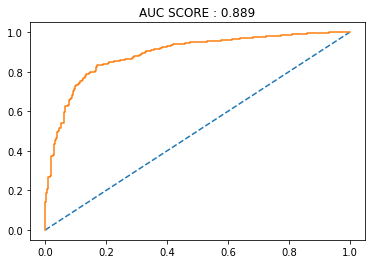

In [76]:
probs_lda_train = ytrain_predict_LDA_prob[:,1]
auc = roc_auc_score(y_train,probs_lda_train)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_train,probs_lda_train)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

AUC SCORE : 0.888


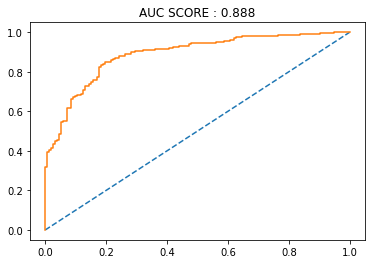

In [77]:
probs_lda_test = ytest_predict_LDA_prob[:,1]
auc = roc_auc_score(y_test,probs_lda_test)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_test,probs_lda_test)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

In [78]:
param_LDA = {'solver':['svd','lsqr','eigen']}
model = LinearDiscriminantAnalysis()
grid_LDA = GridSearchCV(estimator=model,param_grid=param_LDA,cv= 10)

In [79]:
grid_LDA.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']})

In [80]:
print(grid_LDA.best_estimator_)
print(grid_LDA.best_params_)

LinearDiscriminantAnalysis()
{'solver': 'svd'}


In [81]:
best_model_LDA = grid_LDA.best_estimator_

In [82]:
ytrain_predict_LDA = best_model_LDA.predict(X_train)
ytest_predict_LDA = best_model_LDA.predict(X_test)

In [83]:
print(classification_report(y_train,ytrain_predict_LDA))
print('')
print(classification_report(y_test,ytest_predict_LDA))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061


              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [84]:
ytrain_predict_LDA_prob = best_model_LDA.predict_proba(X_train)
ytest_predict_LDA_prob = best_model_LDA.predict_proba(X_test)
pd.DataFrame(ytest_predict_LDA_prob).head(10)

,0,1
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455
5,0.042605,0.957395
6,0.394497,0.605503
7,0.208650,0.791350
8,0.037967,0.962033
9,0.135804,0.864196


In [85]:
accuracy_score(y_train,ytrain_predict_LDA)

0.8341187558906692

In [86]:
accuracy_score(y_test,ytest_predict_LDA)

0.8333333333333334

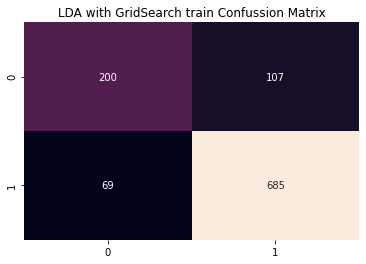

In [87]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict_LDA),annot =True,fmt = '0.0f',cbar=None)
plt.title('LDA with GridSearch train Confussion Matrix')
plt.show;

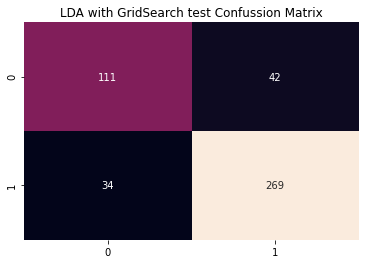

In [88]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_LDA),annot =True,fmt = '0.0f',cbar=None)
plt.title('LDA with GridSearch test Confussion Matrix')
plt.show;

AUC SCORE : 0.889


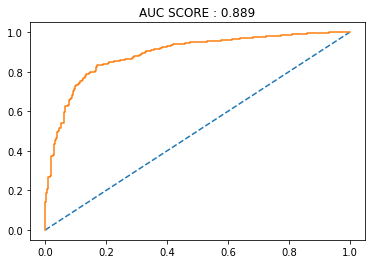

In [89]:
probs_lda_train = ytrain_predict_LDA_prob[:,1]
auc = roc_auc_score(y_train,probs_lda_train)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_train,probs_lda_train)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

AUC SCORE : 0.888


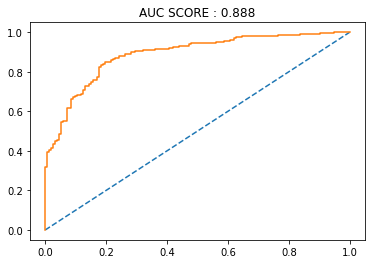

In [90]:
probs_lda_test = ytest_predict_LDA_prob[:,1]
auc = roc_auc_score(y_test,probs_lda_test)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_test,probs_lda_test)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

As we can check the data is balanced, so we can rely on accuracies of the model. By looking at the model performance on train and test data accuracy is almost similar which can justify that model is niether underfit nor over fit, MOdel is robust

In [91]:
for idx,col in enumerate(X_train.columns):
    print('The Coefficient of {} is {}'.format(col,best_model_LDA.coef_[0][idx]))

The Coefficient of age is -0.020037048856610347
The Coefficient of economic.cond.national is 0.6049204499917704
The Coefficient of economic.cond.household is 0.05006904695697722
The Coefficient of Blair is 0.7424003897819801
The Coefficient of Hague is -0.9266343785776759
The Coefficient of Europe is -0.22361192469849597
The Coefficient of political.knowledge is -0.4303348424332059
The Coefficient of gender_male is 0.14907997566596054


#### Q-1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [92]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

*****NAIVE BAYES MODEL*****

In [93]:
GNB = GaussianNB()

In [94]:
GNB.fit(X_train,y_train)

GaussianNB()

In [95]:
ytrain_predict_GNB = GNB.predict(X_train)
ytest_predict_GNB = GNB.predict(X_test)

In [96]:
print(classification_report(y_train,ytrain_predict_GNB))
print('')
print(classification_report(y_test,ytest_predict_GNB))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061


              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [97]:
ytrain_predict_GNB_prob = GNB.predict_proba(X_train)
ytest_predict_GNB_prob = GNB.predict_proba(X_test)
pd.DataFrame(ytest_predict_GNB_prob).head(10)

,0,1
0,0.536792,0.463208
1,0.120285,0.879715
2,0.000332,0.999668
3,0.945240,0.054760
4,0.039267,0.960733
5,0.022669,0.977331
6,0.367634,0.632366
7,0.208123,0.791877
8,0.011473,0.988527
9,0.067547,0.932453


In [98]:
GNB.score(X_train,y_train)

0.8350612629594723

In [99]:
GNB.score(X_test,y_test)

0.8223684210526315

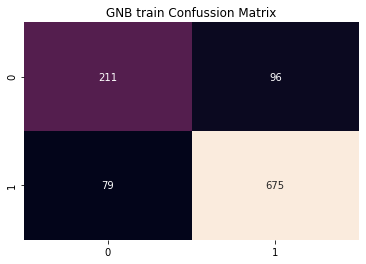

In [100]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict_GNB),annot = True,fmt='0.0f',cbar = None)
plt.title('GNB train Confussion Matrix')
plt.show;

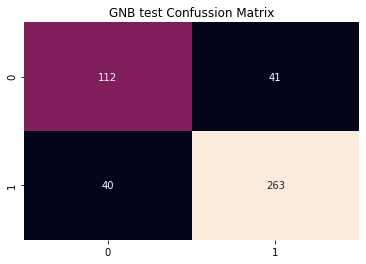

In [101]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_GNB),annot = True,fmt='0.0f',cbar = None)
plt.title('GNB test Confussion Matrix')
plt.show;

AUC SCORE : 0.888


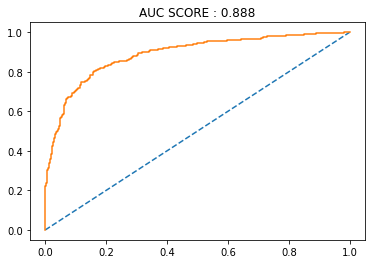

In [102]:
probs_gnb_train = ytrain_predict_GNB_prob[:,1]
auc = roc_auc_score(y_train,probs_gnb_train)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_train,probs_gnb_train)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

AUC SCORE : 0.876


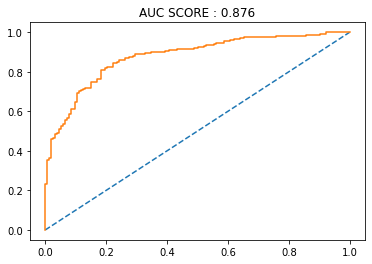

In [103]:
probs_gnb_test = ytest_predict_GNB_prob[:,1]
auc = roc_auc_score(y_test,probs_gnb_test)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_test,probs_gnb_test)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

*****K Nearest Neighbors Model*****

In [104]:
KNN = KNeighborsClassifier()

In [105]:
KNN.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [106]:
ytrain_predict_KNN = KNN.predict(X_train_scaled)
ytest_predict_KNN = KNN.predict(X_test_scaled)

In [107]:
ytrain_predict_KNN_prob = KNN.predict_proba(X_train)
ytest_predict_KNN_prob = KNN.predict_proba(X_test)

C:\Users\home9\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\home9\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [108]:
print(classification_report(y_train,ytrain_predict_KNN))
print('')
print(classification_report(y_test,ytest_predict_KNN))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061


              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



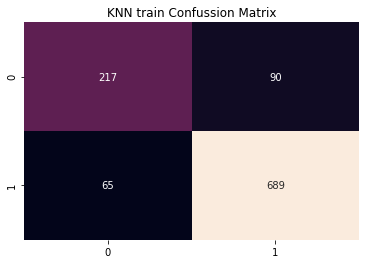

In [109]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict_KNN),annot = True,fmt='0.0f',cbar = None)
plt.title('KNN train Confussion Matrix')
plt.show;

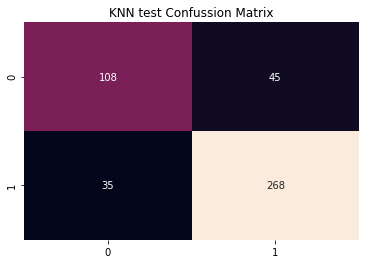

In [110]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_KNN),annot = True,fmt='0.0f',cbar = None)
plt.title('KNN test Confussion Matrix')
plt.show;

AUC SCORE : 0.739


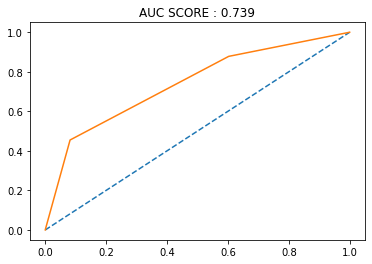

In [111]:
probs_KNN_train = ytrain_predict_KNN_prob[:,1]
auc = roc_auc_score(y_train,probs_KNN_train)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_train,probs_KNN_train)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

AUC SCORE : 0.754


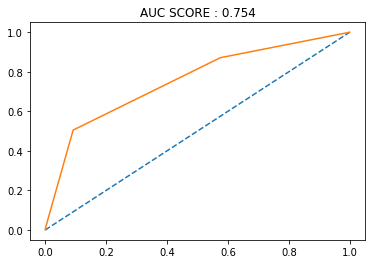

In [112]:
probs_KNN_test = ytest_predict_KNN_prob[:,1]
auc = roc_auc_score(y_test,probs_KNN_test)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_test,probs_KNN_test)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

In [113]:
param_KNN = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]}
model = KNeighborsClassifier()
grid_KNN = GridSearchCV(estimator=model,param_grid=param_KNN,cv = 10,scoring='f1')

In [114]:
grid_KNN.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29]},
             scoring='f1')

In [115]:
print(grid_KNN.best_params_)
print(grid_KNN.best_estimator_)

{'n_neighbors': 25}
KNeighborsClassifier(n_neighbors=25)


In [116]:
best_model_KNN = grid_KNN.best_estimator_

In [117]:
ytrain_predict_KNN = best_model_KNN.predict(X_train_scaled)
ytest_predict_KNN = best_model_KNN.predict(X_test_scaled)

In [118]:
print(classification_report(y_train,ytrain_predict_KNN))
print('')
print(classification_report(y_test,ytest_predict_KNN))

              precision    recall  f1-score   support

           0       0.76      0.64      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061


              precision    recall  f1-score   support

           0       0.80      0.67      0.73       153
           1       0.85      0.92      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



In [119]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test_scaled, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE_table = pd.DataFrame({'K_Value':[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]},MCE)
MCE_table


,K_Value
0.217105,1
0.190789,3
0.175439,5
0.184211,7
0.179825,9
0.166667,11
0.175439,13
0.173246,15
0.164474,17
0.168860,19


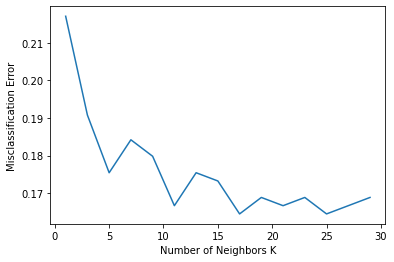

In [120]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,30,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [121]:
ytrain_predict_KNN_prob = best_model_KNN.predict_proba(X_train)
ytest_predict_KNN_prob = best_model_KNN.predict_proba(X_test)
pd.DataFrame(ytest_predict_KNN_prob).head(10)

C:\Users\home9\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\home9\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,0,1
0,0.44,0.56
1,0.44,0.56
2,0.28,0.72
3,0.44,0.56
4,0.40,0.60
5,0.36,0.64
6,0.40,0.60
7,0.40,0.60
8,0.36,0.64
9,0.44,0.56


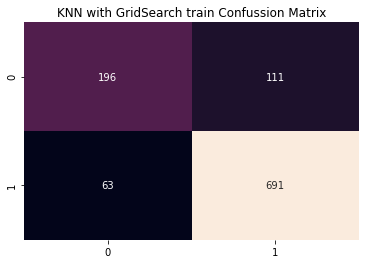

In [122]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict_KNN),annot = True,fmt='0.0f',cbar = None)
plt.title('KNN with GridSearch train Confussion Matrix')
plt.show;

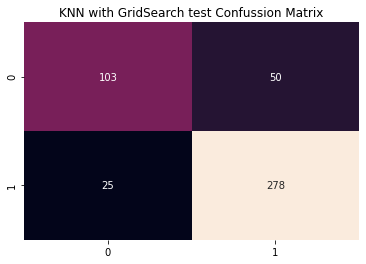

In [123]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_KNN),annot = True,fmt='0.0f',cbar = None)
plt.title('KNN with GridSearch test Confussion Matrix')
plt.show;

AUC SCORE : 0.826


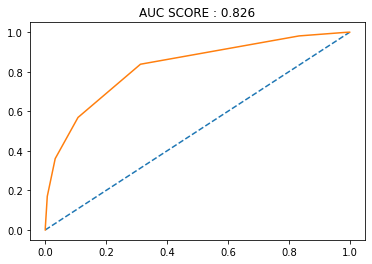

In [124]:
probs_KNN_train = ytrain_predict_KNN_prob[:,1]
auc = roc_auc_score(y_train,probs_KNN_train)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_train,probs_KNN_train)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

AUC SCORE : 0.804


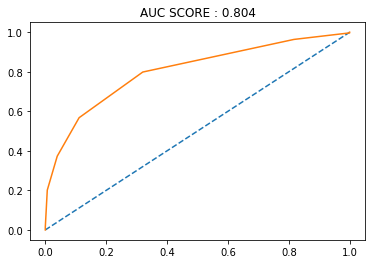

In [125]:
probs_KNN_test = ytest_predict_KNN_prob[:,1]
auc = roc_auc_score(y_test,probs_KNN_test)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_test,probs_KNN_test)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

#### Q-1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

***ENSEMBLE METHODS***

*****BAGGING*****

In [126]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [127]:
BC = BaggingClassifier(n_estimators=100,random_state=1)

In [128]:
BC.fit(X_train,y_train)

BaggingClassifier(n_estimators=100, random_state=1)

In [129]:
ytrain_predict_BC = BC.predict(X_train)
ytest_predict_BC = BC.predict(X_test)

In [130]:
ytrain_predict_BC_prob = BC.predict_proba(X_train)
ytest_predict_BC_prob = BC.predict_proba(X_test)

In [131]:
print(classification_report(y_train,ytrain_predict_BC))
print('')
print(classification_report(y_test,ytest_predict_BC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061


              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



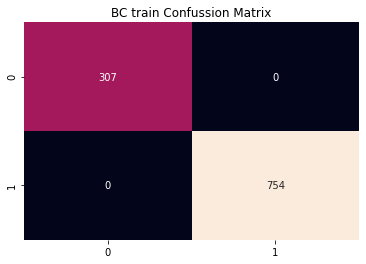

In [132]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict_BC),annot = True,fmt='0.0f',cbar = None)
plt.title('BC train Confussion Matrix')
plt.show;

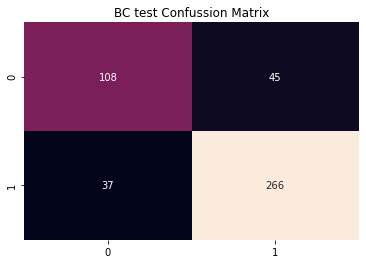

In [133]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_BC),annot = True,fmt='0.0f',cbar = None)
plt.title('BC test Confussion Matrix')
plt.show;

AUC SCORE : 1.000


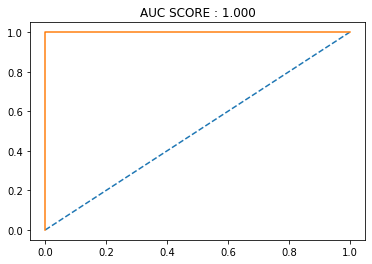

In [134]:
probs_BC_train = ytrain_predict_BC_prob[:,1]
auc = roc_auc_score(y_train,probs_BC_train)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_train,probs_BC_train)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

AUC SCORE : 0.881


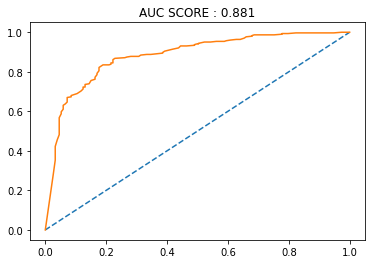

In [135]:
probs_BC_test = ytest_predict_BC_prob[:,1]
auc = roc_auc_score(y_test,probs_BC_test)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_test,probs_BC_test)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

*****RANDOM FOREST*****

In [136]:
BC_RF = BaggingClassifier(RandomForestClassifier(random_state=1))

In [137]:
BC_RF.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1))

In [138]:
ytrain_predict_BC_RF = BC_RF.predict(X_train)
ytest_predict_BC_RF = BC_RF.predict(X_test)

In [139]:
ytrain_predict_BC_RF_prob = BC_RF.predict_proba(X_train)
ytest_predict_BC_RF_prob = BC_RF.predict_proba(X_test)

In [140]:
print(classification_report(y_train,ytrain_predict_BC_RF))
print('')
print(classification_report(y_test,ytest_predict_BC_RF))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       307
           1       0.97      0.98      0.98       754

    accuracy                           0.97      1061
   macro avg       0.96      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061


              precision    recall  f1-score   support

           0       0.79      0.70      0.74       153
           1       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



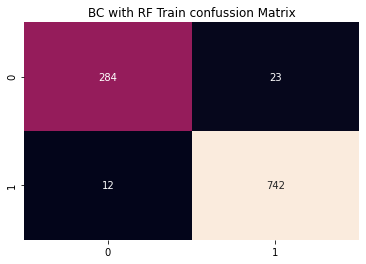

In [141]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict_BC_RF),annot = True,fmt='0.0f',cbar = None)
plt.title('BC with RF Train confussion Matrix')
plt.show;

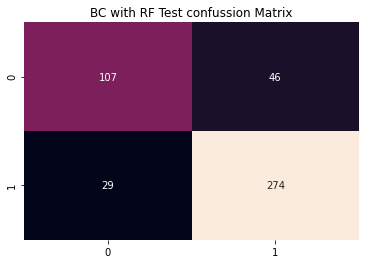

In [142]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_BC_RF),annot = True,fmt='0.0f',cbar = None)
plt.title('BC with RF Test confussion Matrix')
plt.show;

AUC SCORE : 0.996


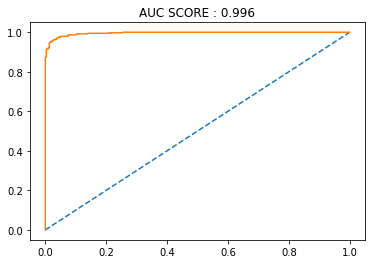

In [143]:
probs_BC_RF_train = ytrain_predict_BC_RF_prob[:,1]
auc = roc_auc_score(y_train,probs_BC_RF_train)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_train,probs_BC_RF_train)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

AUC SCORE : 0.892


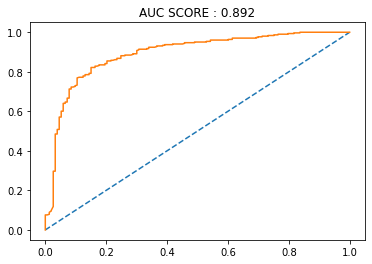

In [144]:
probs_BC_RF_test = ytest_predict_BC_RF_prob[:,1]
auc = roc_auc_score(y_test,probs_BC_RF_test)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_test,probs_BC_RF_test)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

In [145]:
param_RF = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier(random_state=1,n_jobs=2)

grid_RF = GridSearchCV(estimator = rfcl, param_grid = param_RF, cv = 10)

In [146]:
grid_RF.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=2, random_state=1),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [147]:
print(grid_RF.best_estimator_)
print(grid_RF.best_params_)

RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300, n_jobs=2,
                       random_state=1)
{'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 300}


In [148]:
best_model_BC_RF = grid_RF.best_estimator_

In [149]:
ytrain_predict_BC_RF = best_model_BC_RF.predict(X_train)
ytest_predict_BC_RF = best_model_BC_RF.predict(X_test)

In [150]:
ytrain_predict_BC_RF_prob = best_model_BC_RF.predict_proba(X_train)
ytest_predict_BC_RF_prob = best_model_BC_RF.predict_proba(X_test)

In [151]:
print(classification_report(y_train,ytrain_predict_BC_RF))
print('')
print(classification_report(y_test,ytest_predict_BC_RF))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       307
           1       0.88      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.82      1061
weighted avg       0.85      0.85      0.85      1061


              precision    recall  f1-score   support

           0       0.79      0.67      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



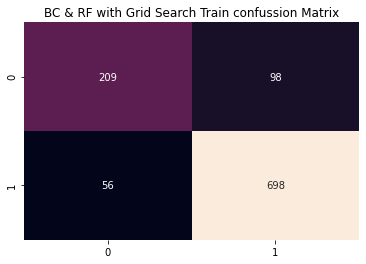

In [152]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict_BC_RF),annot = True,fmt='0.0f',cbar = None)
plt.title('BC & RF with Grid Search Train confussion Matrix')
plt.show;

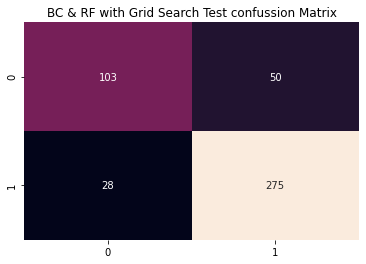

In [153]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_BC_RF),annot = True,fmt='0.0f',cbar = None)
plt.title('BC & RF with Grid Search Test confussion Matrix')
plt.show;

AUC SCORE : 0.912


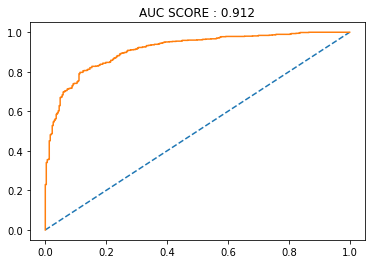

In [154]:
probs_BC_RF_train = ytrain_predict_BC_RF_prob[:,1]
auc = roc_auc_score(y_train,probs_BC_RF_train)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_train,probs_BC_RF_train)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

AUC SCORE : 0.891


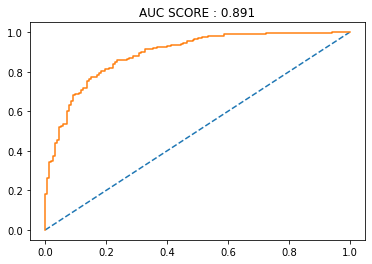

In [155]:
probs_BC_RF_test = ytest_predict_BC_RF_prob[:,1]
auc = roc_auc_score(y_test,probs_BC_RF_test)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_test,probs_BC_RF_test)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

*****BOOSTING*****

In [156]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [157]:
ABC = AdaBoostClassifier(n_estimators=100)

In [158]:
ABC.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [159]:
ytrain_predict_ABC = ABC.predict(X_train)
ytest_predict_ABC = ABC.predict(X_test)

In [160]:
print(classification_report(y_train,ytrain_predict_ABC))
print('')
print(classification_report(y_test,ytest_predict_ABC))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061


              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [161]:
ytrain_predict_ABC_prob = ABC.predict_proba(X_train)
ytest_predict_ABC_prob = ABC.predict_proba(X_test)
pd.DataFrame(ytest_predict_ABC_prob).head(10)

,0,1
0,0.502173,0.497827
1,0.496755,0.503245
2,0.480057,0.519943
3,0.505525,0.494475
4,0.493868,0.506132
5,0.493307,0.506693
6,0.499612,0.500388
7,0.495908,0.504092
8,0.489359,0.510641
9,0.491934,0.508066


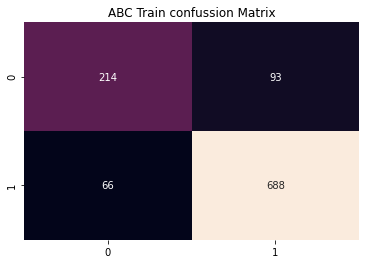

In [162]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict_ABC),annot = True,fmt='0.0f',cbar = None)
plt.title('ABC Train confussion Matrix')
plt.show;

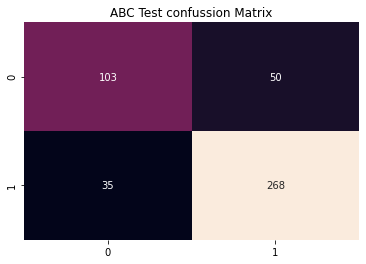

In [163]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_ABC),annot = True,fmt='0.0f',cbar = None)
plt.title('ABC Test confussion Matrix')
plt.show;

AUC SCORE : 0.915


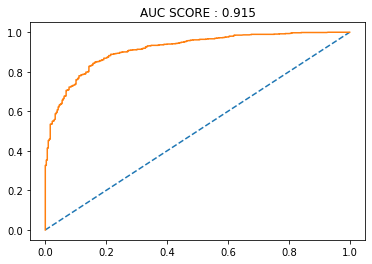

In [164]:
probs_ABC_train = ytrain_predict_ABC_prob[:,1]
auc = roc_auc_score(y_train,probs_ABC_train)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_train,probs_ABC_train)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

AUC SCORE : 0.877


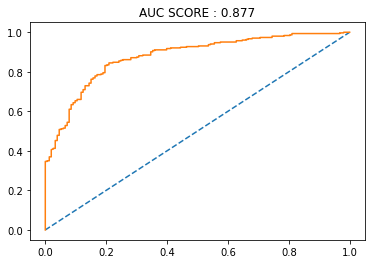

In [165]:
probs_ABC_test = ytest_predict_ABC_prob[:,1]
auc = roc_auc_score(y_test,probs_ABC_test)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_test,probs_ABC_test)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

*****GRADIENT BOOSTING*****

In [166]:
GB = GradientBoostingClassifier(n_estimators=100)

In [167]:
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [168]:
ytrain_predict_GB = GB.predict(X_train)
ytest_predict_GB = GB.predict(X_test)

In [169]:
print(classification_report(y_train,ytrain_predict_GB))
print('')
print(classification_report(y_test,ytest_predict_GB))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061


              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.83       456



In [170]:
ytrain_predict_GB_prob = GB.predict_proba(X_train)
ytest_predict_GB_prob = GB.predict_proba(X_test)
pd.DataFrame(ytest_predict_GB_prob).head(10)

,0,1
0,0.690657,0.309343
1,0.236942,0.763058
2,0.001080,0.998920
3,0.840247,0.159753
4,0.111644,0.888356
5,0.031796,0.968204
6,0.581863,0.418137
7,0.212409,0.787591
8,0.026577,0.973423
9,0.098720,0.901280


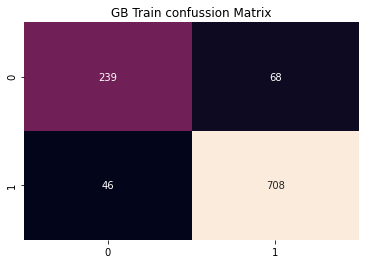

In [171]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict_GB),annot = True,fmt='0.0f',cbar = None)
plt.title('GB Train confussion Matrix')
plt.show;

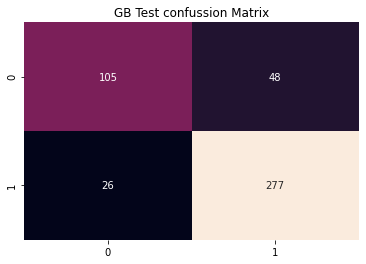

In [172]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_GB),annot = True,fmt='0.0f',cbar = None)
plt.title('GB Test confussion Matrix')
plt.show;

AUC SCORE : 0.951


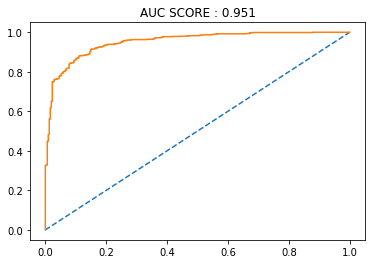

In [173]:
probs_GB_train = ytrain_predict_GB_prob[:,1]
auc = roc_auc_score(y_train,probs_GB_train)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_train,probs_GB_train)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

AUC SCORE : 0.881


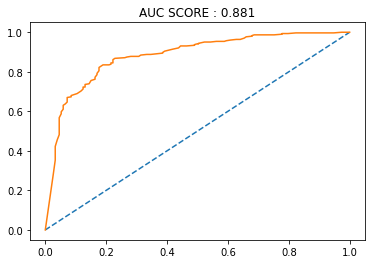

In [174]:
probs_BC_test = ytest_predict_BC_prob[:,1]
auc = roc_auc_score(y_test,probs_BC_test)
print('AUC SCORE : %.3f'% auc)
fpr, tpr, thresholds = roc_curve(y_test,probs_BC_test)
plt.plot([0,1],[0,1] , linestyle = '--')
plt.plot(fpr,tpr)
plt.title('AUC SCORE : %.3f'% auc);

#### Q1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

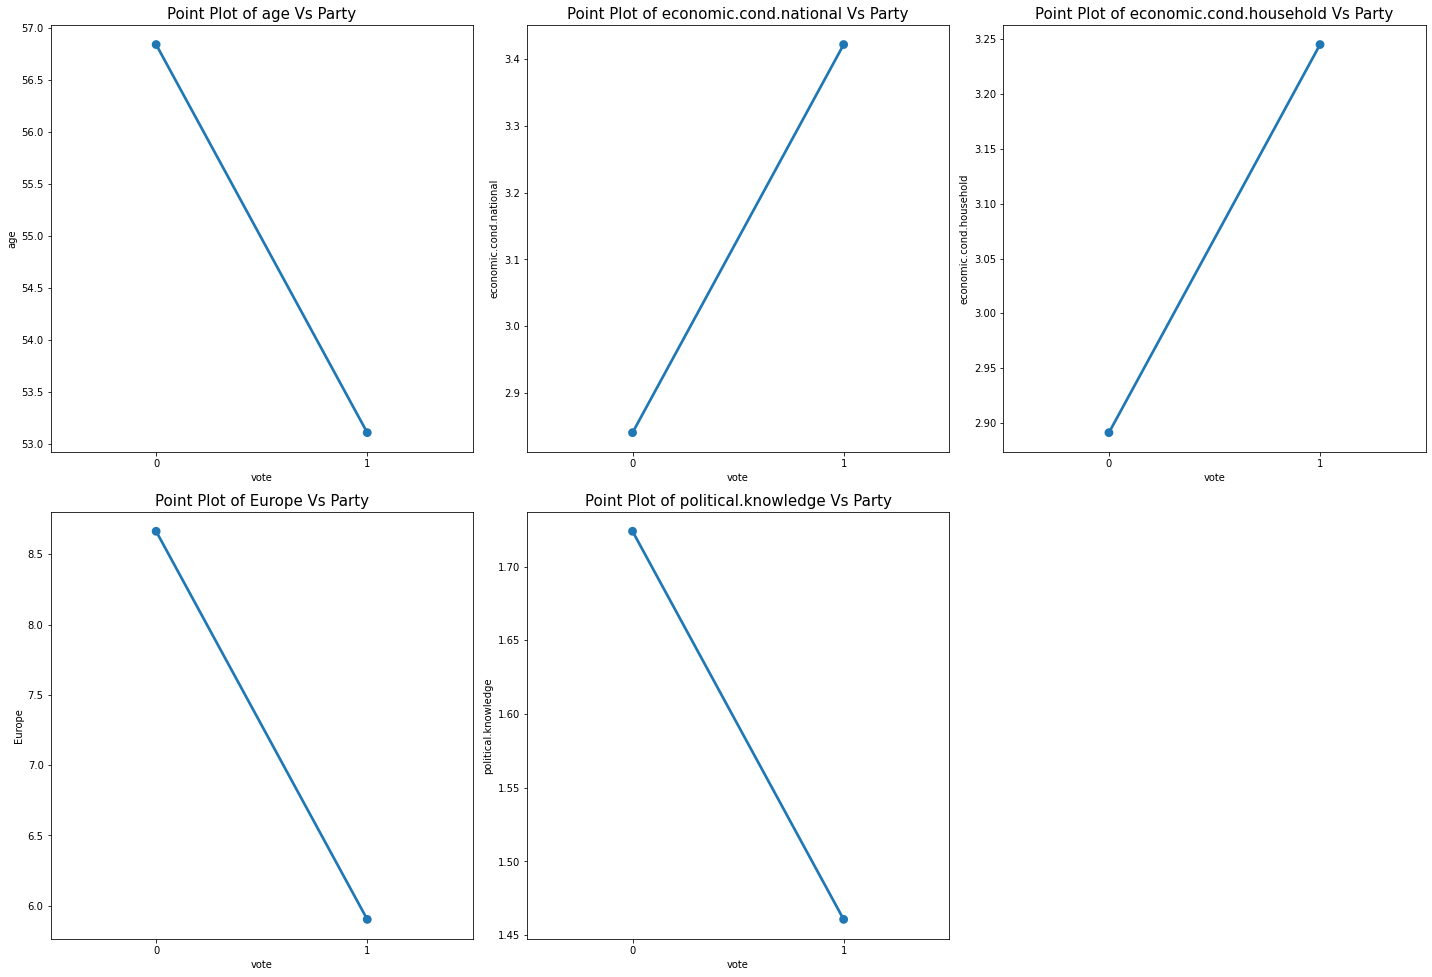

In [175]:
data_plot = survey[['age', 'economic.cond.national', 'economic.cond.household', 'Europe', 'political.knowledge']]
fig = plt.figure(figsize=(20,20))
for column in range(0,len(data_plot.columns)):
    ax = fig.add_subplot(3,3,column+1)
    sns.pointplot(y=data_plot[data_plot.columns[column]],x=survey['vote'],ci=None)
    plt.title('Point Plot of {} Vs Party'.format(data_plot.columns[column]),fontdict={'fontsize': 15,'color': 'black',
                                                                                     'fontweight':10})
    plt.tight_layout()
    plt.show;

***COMMENT***

Company can gather more data regarding conservative party there are less data, so that model can give better accuracy for predicting the Exit pole.
#### BUSINESS INSIGHTS
1. Peole with higher age are more leaned towards voting Conservatiove party, so company can gather more data with elder people.
2. People who belive that National Economic condition and Household Economic condition is higher are more likely to vote for Labour Party. Company can use this to differ between people who support either parties and reason out why.
3. People with high Euro Sceptic thinking are more leaned to vote for Conservative Party.
4. People think that conservative party has more political knowledge than Labour, So this can be topic of debate.


### Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941

President John F. Kennedy in 1961

President Richard Nixon in 1973

In [176]:
import nltk
import string
import re
from nltk.corpus import stopwords

In [177]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt=inaugural.raw('1941-Roosevelt.txt')
Kennedy=inaugural.raw('1961-Kennedy.txt')
Nixon=inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\home9\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [178]:
Speech = pd.DataFrame({'President':['Roosevelt','Kennedy','Nixon'],"Speech":[Roosevelt,Kennedy,Nixon]})

In [179]:
Speech

,President,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


#### Q-2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [180]:
Sentence_1 = nltk.sent_tokenize(Speech['Speech'][0])

In [181]:
Sentence_1[0]

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.'

In [182]:
Sentence_2 = nltk.sent_tokenize(Speech['Speech'][1])

In [183]:
Sentence_3 = nltk.sent_tokenize(Speech['Speech'][2])

In [184]:
Sentence = [len(Sentence_1),len(Sentence_2),len(Sentence_3)]

In [185]:
Speech['Character Count'] = Speech['Speech'].str.len()
Speech['Word Count'] = Speech['Speech'].apply(lambda x:len(str(x).split()))
Speech['Sentence Count'] = Sentence
Speech

,President,Speech,Character Count,Word Count,Sentence Count
0,Roosevelt,On each national day of inauguration since 178...,7571,1360,68
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1390,52
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1819,68


#### Q2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

***Converting all text into lower case***

In [186]:
Speech['Speech'] = Speech['Speech'].apply(lambda x:" ".join(x.lower() for x in x.split()))
Speech

,President,Speech,Character Count,Word Count,Sentence Count
0,Roosevelt,on each national day of inauguration since 178...,7571,1360,68
1,Kennedy,"vice president johnson, mr. speaker, mr. chief...",7618,1390,52
2,Nixon,"mr. vice president, mr. speaker, mr. chief jus...",9991,1819,68


***Punctuation Removal***

In [187]:
Speech['Speech'] = Speech['Speech'].str.replace('[^\w\s]','')
Speech['Speech'][0]

<ipython-input-187-6cfb42448740>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Speech['Speech'] = Speech['Speech'].str.replace('[^\w\s]','')


'on each national day of inauguration since 1789 the people have renewed their sense of dedication to the united states in washingtons day the task of the people was to create and weld together a nation in lincolns day the task of the people was to preserve that nation from disruption from within in this day the task of the people is to save that nation and its institutions from disruption from without to us there has come a time in the midst of swift happenings to pause for a moment and take stock  to recall what our place in history has been and to rediscover what we are and what we may be if we do not we risk the real peril of inaction lives of nations are determined not by the count of years but by the lifetime of the human spirit the life of a man is threescore years and ten a little more a little less the life of a nation is the fullness of the measure of its will to live there are men who doubt this there are men who believe that democracy as a form of government and a frame of 

***STOPWORDS REMOVAL***

In [188]:
stopwords = nltk.corpus.stopwords.words('english') 

In [189]:
Speech['Speech'] = Speech['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

In [190]:
Speech['Speech'][0]

'national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding lifes ideals measured material thin

In [191]:
Speech['Word Count After Cleaning'] = Speech['Speech'].apply(lambda x: len(str(x).split()))
Speech[['President','Speech', 'Word Count','Word Count After Cleaning']]

,President,Speech,Word Count,Word Count After Cleaning
0,Roosevelt,national day inauguration since 1789 people re...,1360,627
1,Kennedy,vice president johnson mr speaker mr chief jus...,1390,693
2,Nixon,mr vice president mr speaker mr chief justice ...,1819,833


#### Q-2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

***MOST COMMON WORDS***

In [192]:
Roosevelt_all_words = Speech['Speech'][0].split()

In [203]:
pd.DataFrame(nltk.FreqDist(Speech['Speech'][0].split()).most_common(3),columns=['Most Frequent Word','Frequency'])

,Most Frequent Word,Frequency
0,nation,11
1,know,10
2,spirit,9


In [194]:
Kennedy_all_words = Speech['Speech'][1].split()

In [204]:
pd.DataFrame(nltk.FreqDist(Speech['Speech'][1].split()).most_common(3),columns=['Most Frequent Word','Frequency'])

,Most Frequent Word,Frequency
0,let,16
1,us,12
2,world,8


In [196]:
Nixon_all_words = Speech['Speech'][2].split()

In [205]:
pd.DataFrame(nltk.FreqDist(Speech['Speech'][2].split()).most_common(3),columns=['Most Frequent Word','Frequency'])

,Most Frequent Word,Frequency
0,us,26
1,let,22
2,peace,19


#### Q-2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [198]:
Roosevelt_wc = Speech["Speech"][0]
Kennedy_wc = Speech['Speech'][1]
Nixon_wc = Speech['Speech'][2]

In [199]:
from wordcloud import WordCloud

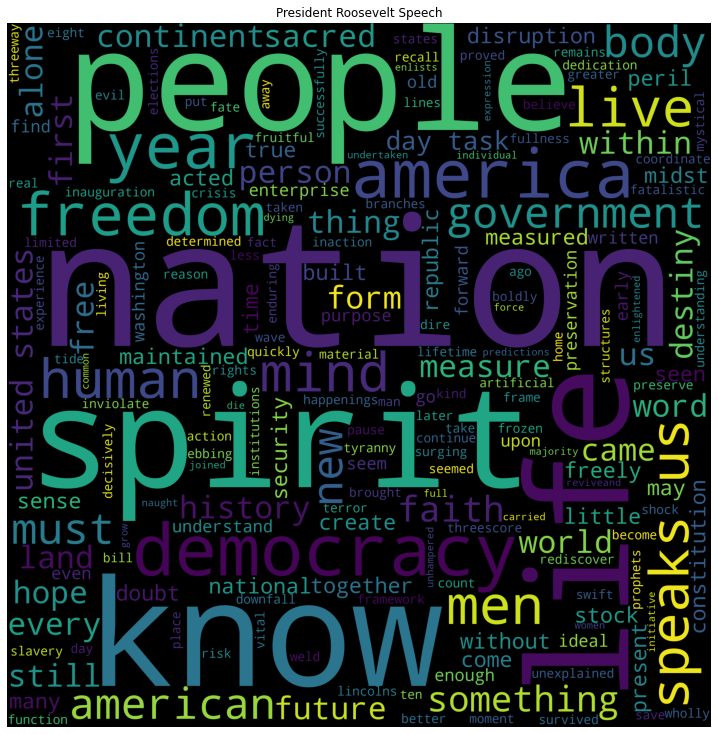

In [200]:
worldcloud = WordCloud(width=3000,height=3000,
                      background_color='black',min_font_size=10,random_state=1).generate(Roosevelt_wc)
plt.figure(figsize=(10,10))
plt.imshow(worldcloud)
plt.axis('off')
plt.xlabel('WorldCloud')
plt.title('President Roosevelt Speech')
plt.tight_layout(pad=0)
plt.show();


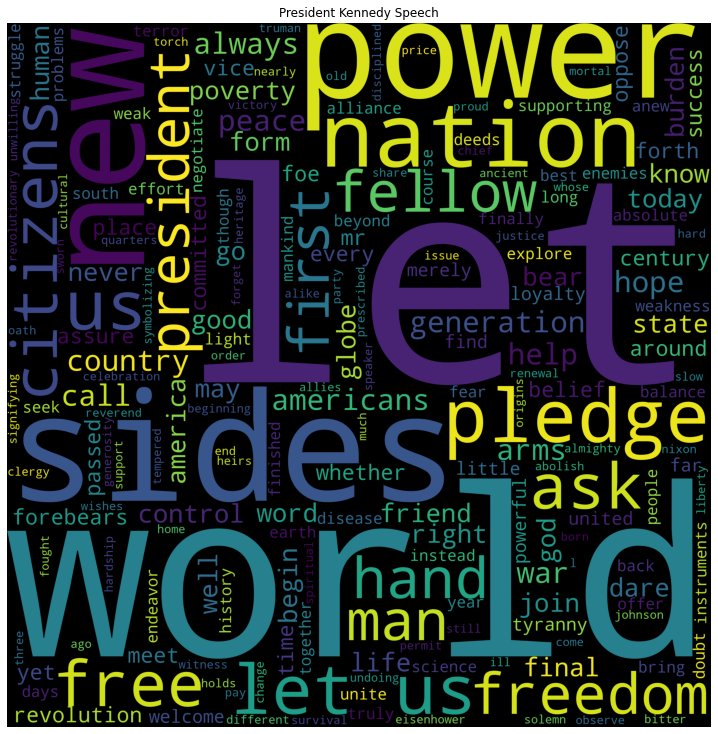

In [201]:
worldcloud = WordCloud(width=3000,height=3000,
                      background_color='black',min_font_size=10,random_state=1).generate(Kennedy_wc)
plt.figure(figsize=(10,10))
plt.imshow(worldcloud)
plt.axis('off')
plt.xlabel('WorldCloud')
plt.title('President Kennedy Speech')
plt.tight_layout(pad=0)
plt.show();

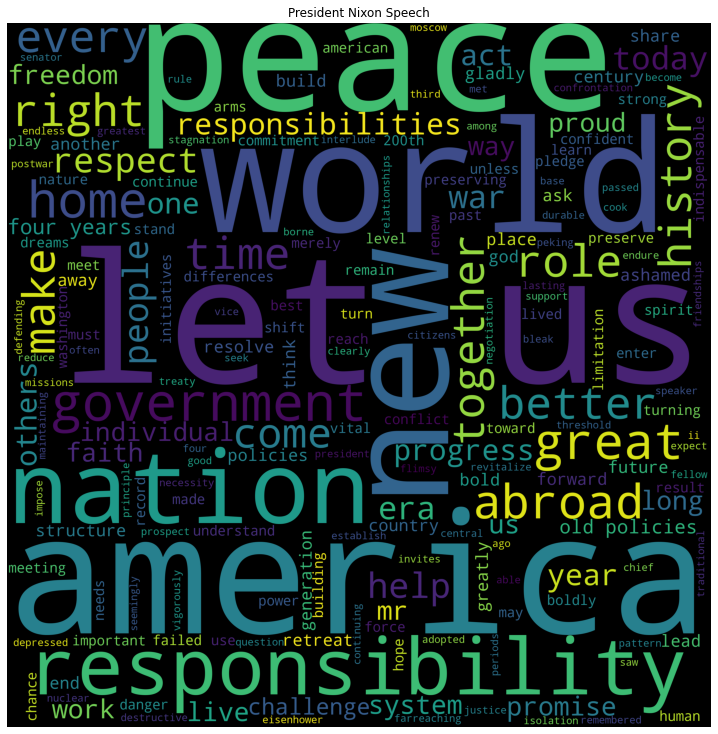

In [202]:
worldcloud = WordCloud(width=3000,height=3000,
                      background_color='black',min_font_size=10,random_state=1).generate(Nixon_wc)
plt.figure(figsize=(10,10))
plt.imshow(worldcloud)
plt.axis('off')
plt.xlabel('WorldCloud')
plt.title('President Nixon Speech')
plt.tight_layout(pad=0)
plt.show();